In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [181]:
def init1(a,b):
    p=np.zeros((len(a)+1,len(a)+1))
    p[0,0]=1
    p[-1,0]=b
    for i in range(1,len(a)): p[i,i+1]=1 #Create companion matrix
    p[-1,1:]=a
    return p

def init2(i):
    n=np.ones((len(i)+1,1))
    n[1:,0]=i
    return n

# i=[a(0),a(1),...,a(r)]   init values
# a=[a_0,a_1,...,a_r]      parameters
# b=b                      bias
def phi(i,a,b,n):
    p=init1(a,b)
    i2=init2(i)
    return np.dot(np.linalg.matrix_power(p,n),i2)[-1,0]  

# phi log2 scale
def phi2(i,a,b,n):
    c=phi(i,a,b,n)
    if c<1 and c>-1: return 0
    elif c>1: return np.log2(c)
    else: return -np.log2(-c)

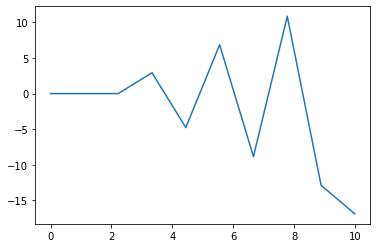

In [217]:
a,i,b=[1,2,0,-4,-5],[-1,-3,-3,0.7,0],10
x=np.linspace(0,10,10)
y=np.array([phi2(i,a,b,int(xi)) for xi in x])
plt.plot(x,y)

In [220]:
val=15
def f3():
    fig, axs = plt.subplots(3,2,gridspec_kw={'hspace': 0.35, 'wspace': 0.1})
    fig.set_size_inches(11,8)
    x=np.linspace(0,val,val)
    
    for j in range(10):
        a,i,b=[1,0],np.random.randn(2),np.random.randn()
        y=np.array([phi(i,a,b,int(xi)) for xi in x])
        axs[0,0].plot(x,y,linewidth=2)  
    axs[0,0].set_title("q(x)=(x+1)(x-1)")
    
    for j in range(10):
        r=np.random.randn()
        a,i,b=[-r,r+1],np.random.randn(2),np.random.randn()
        y=np.array([phi2(i,a,b,int(xi)) for xi in x])
        axs[1,0].plot(x,y,linewidth=2)  
    axs[1,0].set_title("q(x)=(x+1)(x-r) *")
    
    for j in range(10):
        a,i,b=[-1,2],np.random.randn(2),np.random.randn()
        y=np.array([phi(i,a,b,int(xi)) for xi in x])
        axs[2,0].plot(x,y,linewidth=2)  
    axs[2,0].set_title("q(x)=(x-1)^2")
    
    for j in range(10):
        r=np.random.randn()
        a,i,b=[-r*r,2*r],np.random.randn(2),np.random.randn()
        y=np.array([phi2(i,a,b,int(xi)) for xi in x])
        axs[0,1].plot(x,y,linewidth=2)  
    axs[0,1].set_title("q(x)=(x-r)^2 *")
    
    for j in range(10):
        r,s=np.random.randn(),np.random.randn()
        a,i,b=[-r*s,r+s],np.random.randn(2),np.random.randn()
        y=np.array([phi2(i,a,b,int(xi)) for xi in x])
        axs[1,1].plot(x,y,linewidth=2)  
    axs[1,1].set_title("q(x)=(x-r)(x-s) *")
    
    for j in range(10):
        n,p=np.random.randn(),np.random.randn()
        a,i,b=[-n*n-p*p,2*n],np.random.randn(2),np.random.randn()
        y=np.array([phi2(i,a,b,int(xi)) for xi in x])
        axs[2,1].plot(x,y,linewidth=2)  
    axs[2,1].set_title("q(x)=(x-alpha)(x-_alpha_) *")

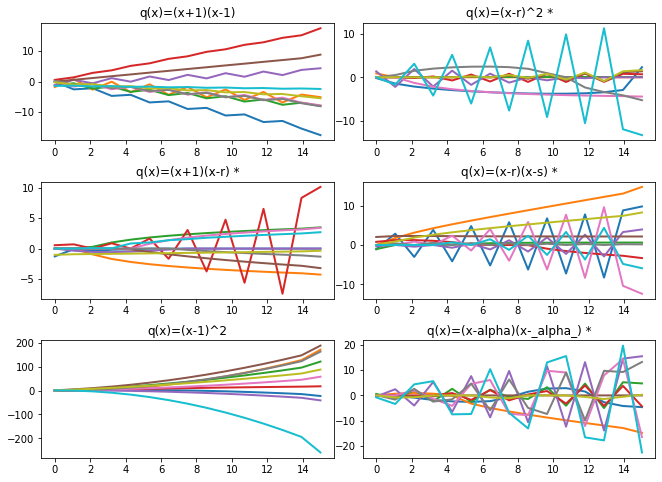

In [221]:
np.random.seed(2)
f3()